# <span style="color:blue"> **Cat vs. Dog Image Classifier Using CNN Keras**</span>

In [43]:
import matplotlib.pyplot as plt 
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input


In [35]:
X_train = np.loadtxt('E:\\Codex Cue Deep Learning Internship\\Project 3\\Image Classification CNN Keras Dataset\\input.csv', delimiter=',')
Y_train = np.loadtxt('E:\\Codex Cue Deep Learning Internship\\Project 3\\Image Classification CNN Keras Dataset\\labels.csv', delimiter=',')

X_test = np.loadtxt('E:\\Codex Cue Deep Learning Internship\\Project 3\\Image Classification CNN Keras Dataset\\input_test.csv', delimiter=',')
Y_test = np.loadtxt('E:\\Codex Cue Deep Learning Internship\\Project 3\\Image Classification CNN Keras Dataset\\labels_test.csv', delimiter=',')

In [36]:
X_train =  X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test =  X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0



In [37]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [38]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

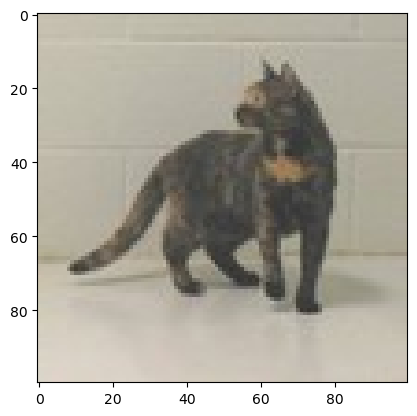

In [39]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

### **Model**

In [44]:
# Define the model
model = Sequential([
    Input(shape=(100, 100, 3)),  # Use Input() as the first layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [48]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [49]:
model.fit(X_train ,Y_train, epochs = 5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.4899 - loss: 0.7651
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.6310 - loss: 0.6761
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.6720 - loss: 0.6198
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 305ms/step - accuracy: 0.7476 - loss: 0.5162
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.8120 - loss: 0.4397


In [50]:
model.fit(X_train ,Y_train, epochs = 5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.8575 - loss: 0.3587
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.9065 - loss: 0.2591
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 228ms/step - accuracy: 0.9186 - loss: 0.2169
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.9388 - loss: 0.1750
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.9647 - loss: 0.1150


## **Evaluation on test data**

In [52]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6938 - loss: 0.8293


[0.9600929021835327, 0.6499999761581421]

## **Making prediction for Individula Image**

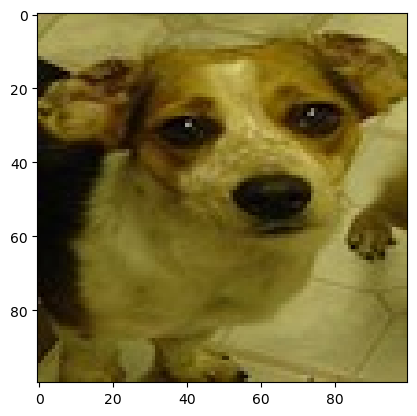

In [58]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()
                    

In [59]:
y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred =y_pred >0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print("Our Model says it is :", pred) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Our Model says it is : dog
